In [ ]:
# 빅데이터 처리 기말 프로젝트
# 컴퓨터정보과 3-B 202144055 박정원
# 주제 :  1인당 국민 총소득과 연도별 암 발생 지표 간 비교 및 앞으로의 암 발생 추이 예상

# 전체 과정 : 데이터 수집 -> 데이터 가공/정제 -> 데이터 시각화 -> 데이터 분석(머신러닝) -> 분석 결과 및 결론

In [ ]:
# 1. 데이터 수집 : 국립 암 센터 암 발생 통계 정보 CSV를 활용
#                : KOICA 오픈 데이터 포털 1인당 GDP CSV를 활용

In [1]:
# 한국어 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,534 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and dire

In [ ]:
# 런타임 재시작
! kill -9 $(ps -A | grep python | awk '{print $1}')

In [ ]:
# 2. 데이터 가공/정제

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('Cancer.csv', encoding='cp949')

df.head(5)

,발생연도,성별,국제질병분류,암종,연령군,발생자수,조발생률
0,1999,남녀전체,00. All cancers,모든암,00-04세,538,16.1
1,1999,남녀전체,00. All cancers,모든암,05-09세,297,8.6
2,1999,남녀전체,00. All cancers,모든암,10-14세,306,9.6
3,1999,남녀전체,00. All cancers,모든암,15-19세,527,13.1
4,1999,남녀전체,00. All cancers,모든암,20-24세,719,18.3


In [ ]:
# 해당 데이터는 발생연도, 성별, 국제질병분류, 암종, 연령군, 발생자수, 조발생률(10만명당 발생률)로 구성되어있습니다.
# 데이터를 수집하였으니 데이터 전처리 과정을 진행하겠습니다.

# 데이터 전처리를 진행하기 전 누락 데이터가 있는지 확인해보겠습니다.

In [2]:
print(df.isnull().sum())
print('')
print(df.dtypes)
print('')
print(df['성별'].unique())
print('')
print(df['암종'].unique())
print('')
df.info

발생연도         0
성별           0
국제질병분류       0
암종           0
연령군          0
발생자수         0
조발생률      5287
dtype: int64

발생연도       object
성별         object
국제질병분류     object
암종         object
연령군        object
발생자수        int64
조발생률      float64
dtype: object

['남녀전체' '남자' '여자']

['모든암' '입술, 구강 및 인두' '식도' '위' '대장' '간' '담낭 및 기타담도' '췌장' '후두' '폐' '유방'
 '자궁경부' '자궁체부' '난소' '전립선' '고환' '신장' '방광' '뇌 및 중추신경계' '갑상선' '호지킨림프종'
 '비호지킨림프종' '다발성 골수종' '백혈병' '기타 암']



<bound method DataFrame.info of             발생연도    성별                 국제질병분류    암종     연령군    발생자수   조발생률
0           1999  남녀전체        00. All cancers   모든암  00-04세     538   16.1
1           1999  남녀전체        00. All cancers   모든암  05-09세     297    8.6
2           1999  남녀전체        00. All cancers   모든암  10-14세     306    9.6
3           1999  남녀전체        00. All cancers   모든암  15-19세     527   13.1
4           1999  남녀전체        00. All cancers   모든암  20-24세     719   18.3
...          ...   ...                    ...   ...     ...     ...    ...
32770  1999-2020    여자  24. All other cancers  기타 암  70-74세   17114   94.2
32771  1999-2020    여자  24. All other cancers  기타 암  75-79세   18452  132.7
32772  1999-2020    여자  24. All other cancers  기타 암  80-84세   15252  172.2
32773  1999-2020    여자  24. All other cancers  기타 암   85세이상   13278  209.2
32774  1999-2020    여자  24. All other cancers  기타 암    연령전체  143413   26.3

[32775 rows x 7 columns]>

In [ ]:
# 결측치 확인: '조발생률' 열에 5287개의 결측치가 있습니다.
# 그렇다면 결측치를 처리해보겠습니다.

In [8]:
df.dropna(subset=['조발생률'], inplace=True)
print(df.isnull().sum())

발생연도      0
성별        0
국제질병분류    0
암종        0
연령군       0
발생자수      0
조발생률      0
dtype: int64


In [ ]:
# 잘 제거된 모습입니다.
# 결측치 제거를 수행하였으니 전처리 과정을 진행해보겠습니다.

In [9]:
# 데이터 형식 확인 및 조정
df['발생연도'] = df['발생연도'].astype(int)
df['조발생률'] = df['조발생률'].astype(float)

# 필요한 열 선택 및 재구성
df = df[['발생연도', '성별', '암종', '연령군', '발생자수', '조발생률']]

# 데이터 정렬
df = df.sort_values(by=['발생연도', '성별', '연령군'])

ValueError: ignored

In [5]:
# 오류가 발생된 모습입니다. 그 이유는 1999-2020의 통합 데이터가 포함되어있기 때문입니다.
# 통합 데이터는 필요없는 데이터이기에 역시 제거해야합니다.
# 성별에서 남녀전체라는 데이터 역시 주제에 맞지 않는 데이터이므로 제거합니다.
# 연령군 부분에서 연령전체 데이터 역시 통합 데이터이므로 제거합니다.
# 암종 부분에서 모든암 데이터 역시 통합 데이터이므로 제거합니다.

In [10]:
# '남녀전체' 데이터를 포함한 행 제거
df = df[df['성별'] != '남녀전체']

# '연령전체' 데이터를 포함한 행 제거
df = df[df['연령군'] != '연령전체']

# '모든암' 데이터를 포함한 행 제거
df = df[df['암종'] != '모든암']

# '발생연도' 열에서 범위 값을 포함하는 행 제거
df = df[~df['발생연도'].str.contains('-')]

# '발생연도' 열을 정수형으로 변환
df['발생연도'] = df['발생연도'].astype(int)

# '조발생률' 열을 실수형으로 변환
df['조발생률'] = df['조발생률'].astype(float)

# 필요한 열 선택 및 재구성
df = df[['발생연도', '성별', '암종', '연령군', '발생자수', '조발생률']]

# 데이터 정렬
df = df.sort_values(by=['발생연도', '성별', '연령군', '암종'])

df.info

<bound method DataFrame.info of        발생연도  성별         암종     연령군  발생자수   조발생률
6574   1999  남자          간  00-04세    11    0.6
19684  1999  남자         고환  00-04세    25    1.4
31483  1999  남자       기타 암  00-04세    79    4.5
23617  1999  남자  뇌 및 중추신경계  00-04세    45    2.6
5263   1999  남자         대장  00-04세     1    0.1
...     ...  ..        ...     ...   ...    ...
16984  2020  여자       자궁체부   85세이상    23    4.0
10429  2020  여자         췌장   85세이상   524   91.9
13051  2020  여자          폐   85세이상   935  163.9
27472  2020  여자     호지킨림프종   85세이상     1    0.2
11740  2020  여자         후두   85세이상     6    1.1

[14902 rows x 6 columns]>

In [ ]:
# [32775 rows x 7 columns]> 의 데이터가 데이터 전처리 과정 이후 [14902 rows x 6 columns]> 가 되었습니다.
# 여기서 국제 질병 분류 코드는 암종이 있기에 필요 없는 데이터이기에 제거하였습니다.

In [12]:
# 인덱스 재정렬
df.reset_index(drop=True, inplace=True)

# 데이터 확인
df.info

<bound method DataFrame.info of        발생연도  성별         암종     연령군  발생자수   조발생률
0      1999  남자          간  00-04세    11    0.6
1      1999  남자         고환  00-04세    25    1.4
2      1999  남자       기타 암  00-04세    79    4.5
3      1999  남자  뇌 및 중추신경계  00-04세    45    2.6
4      1999  남자         대장  00-04세     1    0.1
...     ...  ..        ...     ...   ...    ...
14897  2020  여자       자궁체부   85세이상    23    4.0
14898  2020  여자         췌장   85세이상   524   91.9
14899  2020  여자          폐   85세이상   935  163.9
14900  2020  여자     호지킨림프종   85세이상     1    0.2
14901  2020  여자         후두   85세이상     6    1.1

[14902 rows x 6 columns]>

In [13]:
# 데이터 타입 확인
df.dtypes

발생연도      int64
성별       object
암종       object
연령군      object
발생자수      int64
조발생률    float64
dtype: object

In [ ]:
# reset_index를 이용하여 전처리 후 섞인 index를 재정렬하였습니다.

# 지금까지 진행한 전처리 내용을 요약해보았습니다.
#  - 결측치 처리: '조발생률' 열의 결측치를 제거했습니다.
#  - 데이터 필터링: '남녀전체' 성별 데이터와 '발생연도', '연령군' 열의 비정상적인 범위 값을 포함하는 행을 제거했습니다.
#  - 데이터 형식 조정: '발생연도'와 '조발생률' 열의 데이터 타입을 적절하게 변환했습니다.
#  - 필요한 열 선택 및 재구성: 분석에 필요한 열을 선택하고 필요에 따라 데이터를 재구성했습니다.
#  - 데이터 정렬 및 인덱스 재정렬: 데이터를 적절한 순서로 정렬하고 인덱스를 재정렬했습니다.

In [ ]:
# 이제 데이터 전처리가 어느정도 되었으므로 머신러닝을 하기 위한 준비를 해보겠습니다.
# 제가 가지고 있는 데이터는 연도별 암 발생률과 같은 시간에 따라 변화하는 수치를 포함하고 있습니다.
# 이런 종류의 데이터는 시계열 데이터로 간주하고 시계열 데이터 분석은 시간에 따른 패턴을 파악하고 미래 값을 예측하는 데 특화되어 있기에 시계열 예측을 활용하고자 합니다.
# 시계열 예측에 이용할 수 있는 모델 종류에는 ARIMA, SARIMA, Prophet, LSTM 등등이 있는데 저는 ARIMA를 이용하여 머신러닝을 해보고자 합니다.

In [ ]:
# 3. 데이터 시각화

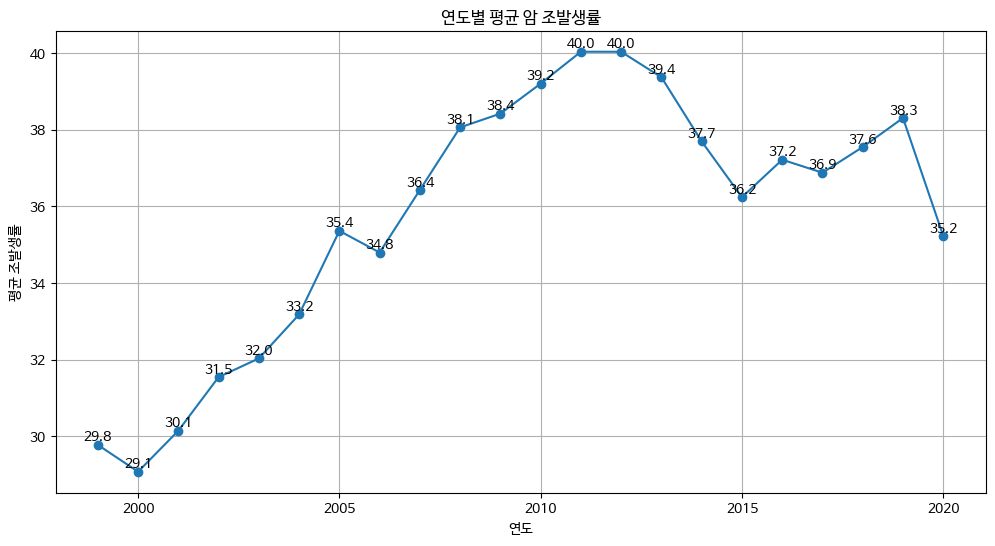

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# '발생연도'와 '조발생률'을 기준으로 평균을 계산
yearly_avg = df.groupby('발생연도')['조발생률'].mean()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg, marker='o')
for year, rate in yearly_avg.items():
    plt.text(year, rate, f'{rate:.1f}', ha='center', va='bottom')
plt.title('연도별 평균 암 조발생률')
plt.xlabel('연도')
plt.ylabel('평균 조발생률')
plt.grid(True)
plt.show()

In [ ]:
# 해당 통계와 데이터는 모든 암을 기준으로 작성되어있습니다. 하지만 저는 암종 별 발생에 대한 정보 역시 확인하고 싶습니다.
# 하지만 해당 데이터를 한 화면에 나타내기는 어렵기 떄문에 애니메이션을 포함한 데이터로 나타내주는 것이 좋아보입니다.

In [9]:
import plotly.express as px

# '모든 암' 카테고리 제거
df = df[df['암종'] != '모든암']

# Plotly를 사용하여 대화형 그래프 생성
fig = px.bar(df, x='암종', y='조발생률', color='암종', animation_frame='발생연도')

# 그래프 표시
fig.show()

In [ ]:
# 암종에 따른 조발생률의 변화를 그래프로 나타내보았습니다.
# 크게 보여지는 부분은 위암이 가장 높은 발생률로 나타났으나 점점 내려가 폐암이 가장 높은 조발생률을 가져갔으며 림프종, 백혈병 등의 호르몬 관련 암들의 발생률이 증가하였음이 보입니다.
# 아마도 의료 수준과 소득 수준의 상승으로 조발생률이 점점 더 낮아지지 않을까라는 예상을 해봅니다.
# 시계열 분석에 적합한 ARIMA 모델을 이용해서 머신러닝을 진행 한 후 2025년까지의 예상 조발생률을 그래프로 나타내보겠습니다.

In [ ]:
# 4. 데이터 분석(머신러닝)

In [ ]:
# 머신러닝을 진행하기 전 해당 데이터가 머신러닝을 하기에 적합한 수준의 데이터가 맞는지를 확인해보고 진행해보도록 하겠습니다.
# 시계열 모델로 머신러닝을 진행하기로한 이유는 현재 가지고 있는 데이터가 시간에 따라 변화(1999년에서 2020년까지)하는 데이터를 분석하고 예측하려고 하기 때문입니다.

In [14]:
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 수행
result = adfuller(yearly_avg)

# ADF 테스트 결과 출력
print('ADF 통계량: %f' % result[0])
print('p-value: %f' % result[1])
print('임계값:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF 통계량: -3.464563
p-value: 0.008945
임계값:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
# 데이터를 분석한 결과
# ADF 통계량 값은 값이 더 음수일수록, 데이터가 정상성을 가질 가능성이 높습니다.
# p-value 값이 낮을수록, 데이터가 정상적이라는 뜻으로 일반적으로 0.05(5%) 또는 그 이하면 정상적인 데이터일 확률이 높습니다.
# 따라서 지금까지 전처리한 데이터는 정상적인 시계열 데이터임을 의미합니다.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

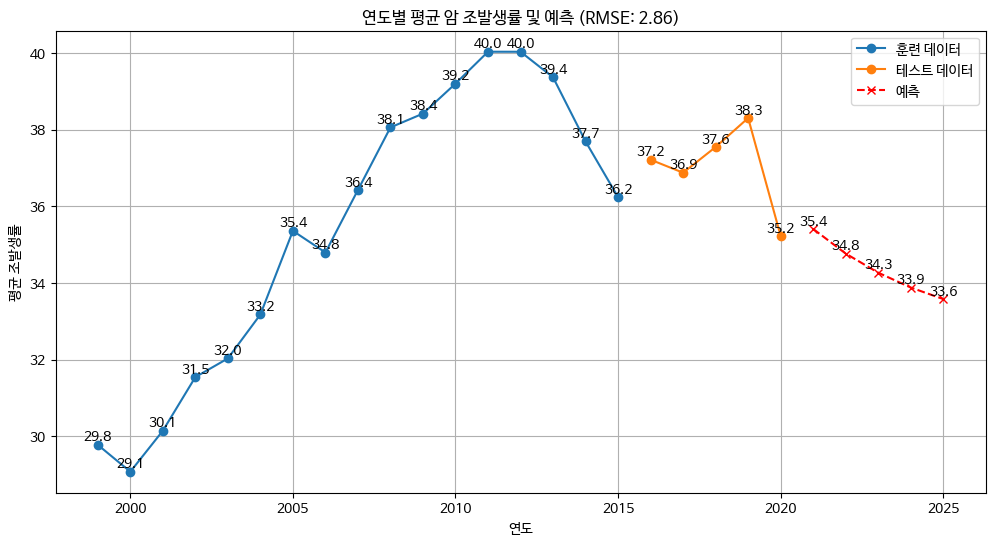

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# '발생연도'와 '조발생률'을 기준으로 평균을 계산
yearly_avg = df.groupby('발생연도')['조발생률'].mean()

# 훈련 데이터와 테스트 데이터 분리
train = yearly_avg.iloc[:-5]
test = yearly_avg.iloc[-5:]

# ARIMA 모델 피팅 및 예측
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(test, forecast))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train, marker='o', label='훈련 데이터')
plt.plot(test, marker='o', label='테스트 데이터')
plt.plot(range(2021, 2026), forecast, marker='x', linestyle='--', color='red', label='예측')

# 각 점 위에 값 표시
for year, rate in train.items():
    plt.text(year, rate, f'{rate:.1f}', ha='center', va='bottom')
for year, rate in test.items():
    plt.text(year, rate, f'{rate:.1f}', ha='center', va='bottom')
for i, rate in enumerate(forecast):
    plt.text(2021 + i, rate, f'{rate:.1f}', ha='center', va='bottom')

plt.title('연도별 평균 암 조발생률 및 예측 (RMSE: {:.2f})'.format(rmse))
plt.xlabel('연도')
plt.ylabel('평균 조발생률')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 위에서 예상하였던 것 처럼 연도별 조발생률이 점점 낮아질 것으로 머신러닝의 결과가 보여주고 있습니다.
# 이제 해당 그래프와 1인당 GDP 데이터를 활용한 그래프를 비교해보는 것으로 프로젝트를 마무리하겠습니다.

In [ ]:
# 두 번째 데이터인 Real_Income_data.csv에 해당하는 그래프를 작성해보겠습니다. 1인당 GDP와 평균 암 조발생률 간의 비교를 위한 그래프입니다.

In [18]:
import pandas as pd
import numpy as np

df_R = pd.read_csv('Real_Income_data.csv')

In [ ]:
# 1인당 GDP CSV 파일을 불러왔습니다.
# 불러온 데이터를 바탕으로 그래프를 작성해보겠습니다(전처리가 필요하지 않은 데이터)

In [22]:
df_R.head(5)

,1인당 실질 국민총소득
연도,
1999,10672.42
2000,12256.99
2001,11561.25
2002,13165.07
2003,14672.86


In [ ]:
# 연도와 GDP 두개만 포함하는 데이터입니다. 처음에 데이터를 저장할때 1999년부터 2021년까지의 데이터만 추출하였습니다.(2021년까지만 존재)

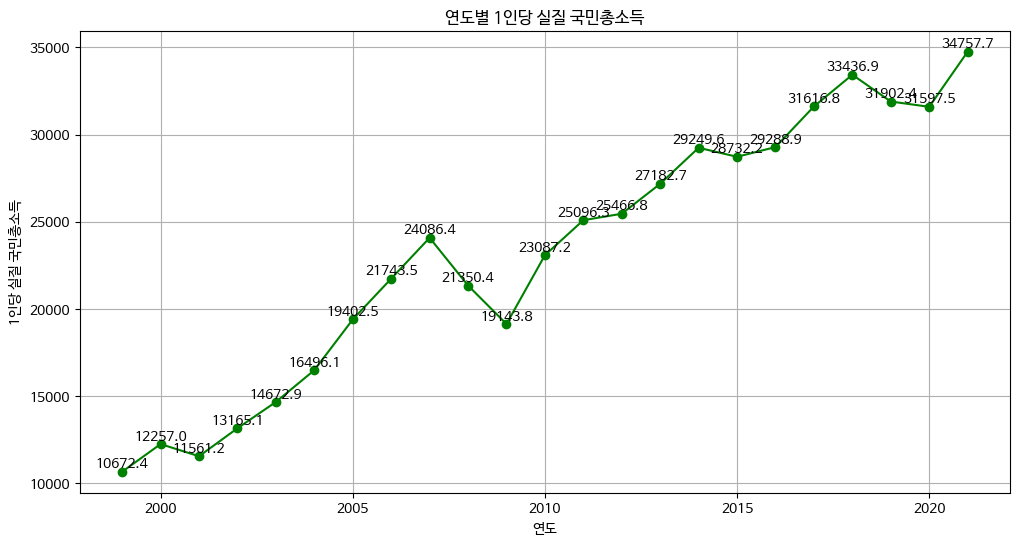

In [19]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 데이터프레임 구조 조정
df_R.columns = ['연도', '1인당 실질 국민총소득']
df_R.set_index('연도', inplace=True)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_R['1인당 실질 국민총소득'], marker='o', color='green')
for year, income in df_R['1인당 실질 국민총소득'].items():
    plt.text(year, income, f'{income:.1f}', ha='center', va='bottom')
plt.title('연도별 1인당 실질 국민총소득')
plt.xlabel('연도')
plt.ylabel('1인당 실질 국민총소득')
plt.grid(True)
plt.show()

In [ ]:
# 5. 분석 결과 및 결론

In [ ]:
# 각각의 그래프를 한 화면에 나타나도록 해보겠습니다.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

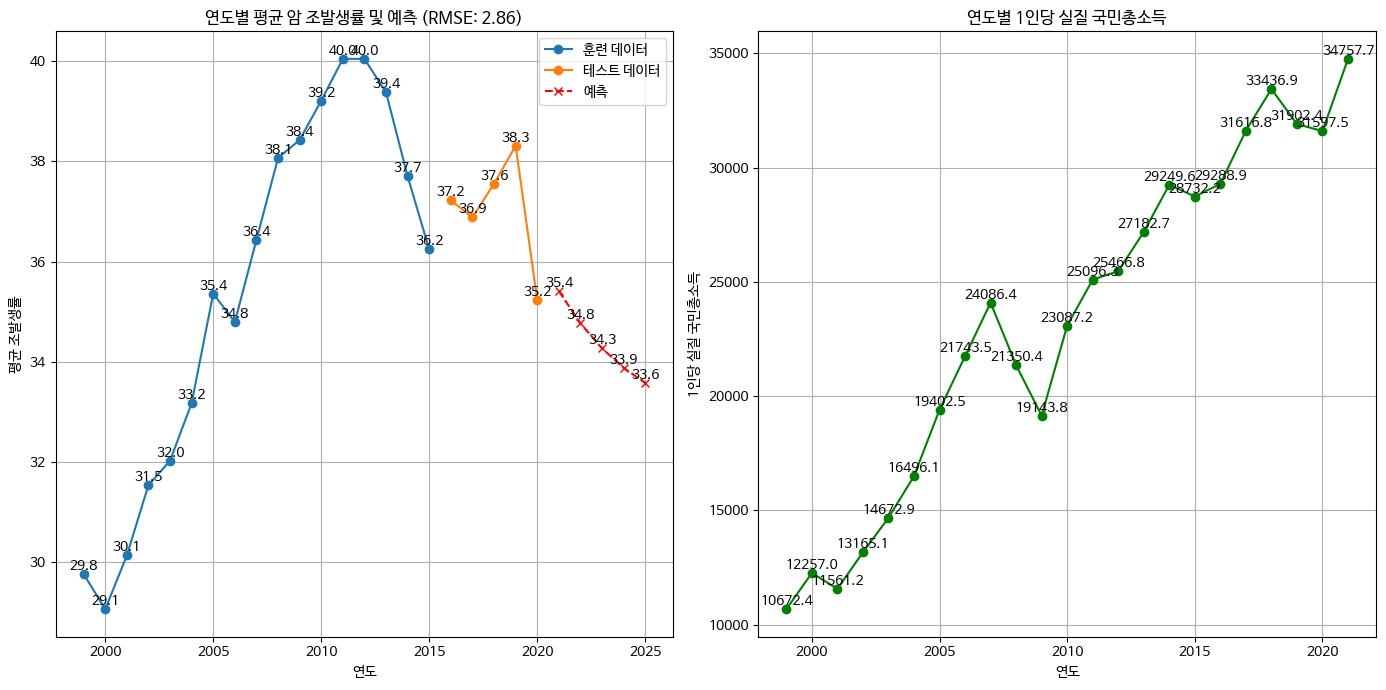

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# 'df' 데이터프레임에서 '발생연도'와 '조발생률'을 기준으로 평균을 계산
# 여기서 'df'는 앞서 언급한 암 데이터를 포함하는 데이터프레임입니다.
yearly_avg = df.groupby('발생연도')['조발생률'].mean()

# 훈련 데이터와 테스트 데이터 분리
train = yearly_avg.iloc[:-5]
test = yearly_avg.iloc[-5:]

# ARIMA 모델 피팅 및 예측
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(test, forecast))

# 비교 그래프 생성
plt.figure(figsize=(14, 7))

# 연도별 평균 암 조발생률 및 예측 시각화
plt.subplot(1, 2, 1)
plt.plot(train, marker='o', label='훈련 데이터')
plt.plot(test, marker='o', label='테스트 데이터')
plt.plot(range(2021, 2026), forecast, marker='x', linestyle='--', color='red', label='예측')
for year, rate in train.items():
    plt.text(year, rate, f'{rate:.1f}', ha='center', va='bottom')
for year, rate in test.items():
    plt.text(year, rate, f'{rate:.1f}', ha='center', va='bottom')
for i, rate in enumerate(forecast):
    plt.text(2021 + i, rate, f'{rate:.1f}', ha='center', va='bottom')
plt.title('연도별 평균 암 조발생률 및 예측 (RMSE: {:.2f})'.format(rmse))
plt.xlabel('연도')
plt.ylabel('평균 조발생률')
plt.legend()
plt.grid(True)

# 연도별 1인당 실질 국민총소득 시각화
plt.subplot(1, 2, 2)
plt.plot(df_R['1인당 실질 국민총소득'], marker='o', color='green')
for year, income in df_R['1인당 실질 국민총소득'].items():
    plt.text(year, income, f'{income:.1f}', ha='center', va='bottom')
plt.title('연도별 1인당 실질 국민총소득')
plt.xlabel('연도')
plt.ylabel('1인당 실질 국민총소득')
plt.grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# 1인당 실질 국민총소득은 2009년 2010년 잠깐 하락한 부분이 있지만 계속해서 우상향하는 그림을 가지고 있고
# 암 조발생률 그래프는 n자를 그리는 모습을 보입니다.

In [14]:
# 처음 이번 주제를 선정하였을 때는 연도별 1인당 국민총소득이 계속해서 우상향했다는 사실은 알고 있었지만
# 암 조발생률의 정보는 모르는 상태에서 아마도 1인당 국민총소득이 늘어남에 따라 암 조발생률이 감소하지 않을까? 라는 가정을 가지고 프로젝트를 진행해보았습니다.

# 결과론적으로 암 평균 조발생률과 1인당 국민총소득 간의 직접적인 연관성은 찾지 못하였습니다.
# 하지만 암종에 따른 조발생률의 변화를 그래프를 보면 과거에는 식사 환경이 좋지 못하고 음식의 수준 역시 높지 못하였다보니 위암이 가장 높은 부분을 차지했으나
# 현재에는 갑상선, 림프종 등등 호르몬 관련 암들이 증가하는 모습을 보입니다. 아마 과거보다 많은 전자파 속에서 살고 있다보니 이러한 암들의 발생률이 높아지지 않았을까? 하는 생각을 해봅니다.
# 또한 현재는 몸 자체가 힘든 것 보다도 정신적으로 힘든 사람들이 많은 만큼 스트레스가 이러한 결과에 원인이 되지 않았나 하는 생각을 하였습니다.

In [ ]:
# 머신러닝의 예측 결과로보면 앞으로는 암 조발생률이 우하향할 것이라는 예측을 보여줌과 같이 더 이상은 암으로 고통 받는 사람들이 없었으면 하는 바램을 가지고 프로젝트를 마무리해보고자합니다.